In [170]:
import pandas as pd
data = pd.read_csv("../data2/data.csv")


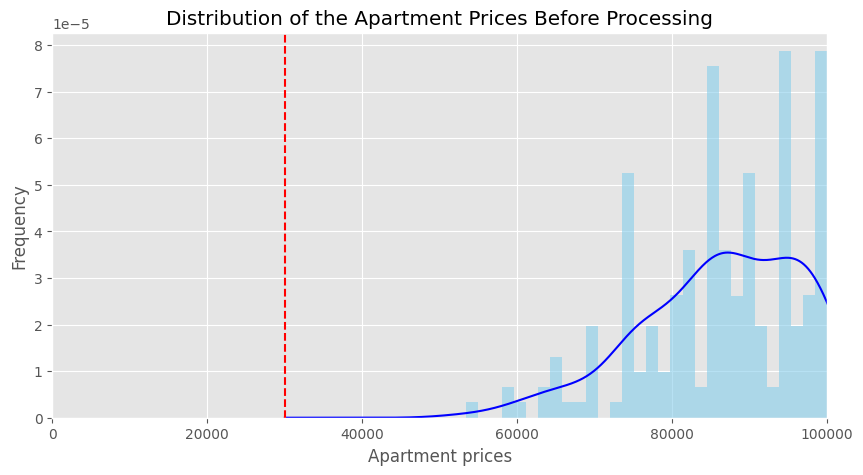

In [169]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

prices = data.price

# Visualise the data only in the range of 0 and 100000
filtered_data = prices[(prices >= 0) & (prices <= 100000)]

# Style it like in the image (blue bars, density curve)
plt.figure(figsize=(10,5))
plt.hist(filtered_data, bins=30, density=True, alpha=0.6, color='skyblue')

# Fit a density curve
density = pd.Series(filtered_data).plot.kde(color='b')

# Setting the limit on the x-axis to be between 0 and 100000
plt.xlim(0, 100000)

# Improving the style to match the provided image
plt.style.use('ggplot')
plt.xlabel('Apartment prices')
plt.ylabel('Frequency')
plt.title('Distribution of the Apartment Prices Before Processing')
plt.axvline(30000, color='red', linestyle='--')
plt.savefig("../visualizations/Distribution of Prices Before Processing.png", dpi=800)
# Show the plot
plt.show()


In [165]:
mean = prices.mean()
std = prices.std()

# Define a threshold (e.g., 2)
threshold = 2

# Compute z-scores
z_scores = (prices - mean) / std

# Create a new Series without outliers
prices[abs(z_scores) > threshold]

61       2300000.0
156      2400000.0
988      2100000.0
1849    37950000.0
2362     2600000.0
Name: price, dtype: float64

In [133]:
data.loc[data.price < 30000, 'price'] = data[data.price < 30000].price * data[data.price < 30000].area

In [121]:
# Calculating IQR for 'price' and 'area'
Q1 = data[['price', 'area']].quantile(0.25)
Q3 = data[['price', 'area']].quantile(0.75)
IQR = Q3 - Q1

# Determining the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = ((data[['price', 'area']] < lower_bound) | (data[['price', 'area']] > upper_bound)).any(axis=1)

# Count of outliers
outliers_count = outliers.sum()

# Removing outliers from the dataset
data_cleaned = data[~outliers]

# Displaying the result
outliers_count, data_cleaned.shape


(228, (2140, 21))

In [70]:
data_cleaned.dropna()

,source,id,price,area,rooms,floor,storeys,building_type,condition,bathroom_count,...,F_Air Conditioner,F_Security,F_Balcony,F_Heating System,F_Furniture,F_Internet,F_Elevator,latitude,longitude,coordinates
0,bars,4-3-1430,130000.0,60.5,2.0,3.0,13.0,Other,Needs Renovation/Repair,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.503848,40.198558,"(40.19855807840442, 44.50384769146143)"
1,bars,4-3-1430.1,215000.0,96.1,3.0,4.0,13.0,Other,Needs Renovation/Repair,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.503848,40.198558,"(40.19855807840442, 44.50384769146143)"
2,bars,1-N-432,560000.0,156.4,4.0,9.0,17.0,Other,Good Condition,2.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,44.583871,40.216732,"(40.21673211791397, 44.583870697678144)"
3,bars,1-N-429,410000.0,75.0,3.0,3.0,12.0,Other,Good Condition,2.0,...,1.0,1.0,1.0,1.0,0.0,0.0,1.0,44.504497,40.183219,"(40.1832187, 44.50449735)"
4,bars,1-A-118,420000.0,138.0,4.0,3.0,5.0,Other,Good Condition,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,44.512284,40.195903,"(40.19590302536037, 44.51228432718437)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,bnakaran,d117204,315000.0,152.0,5.0,8.0,9.0,Monolit,Good Condition,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.552101,40.216801,"(40.216800689697, 44.552101135254)"
2363,bnakaran,d117922,150000.0,78.0,2.0,4.0,10.0,Monolit,Needs Renovation/Repair,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,44.499482,40.180919,"(40.180918819905, 44.49948248941)"
2364,bnakaran,d93008,260000.0,90.0,3.0,3.0,5.0,Stone,Good Condition,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,44.484030,40.192541,"(40.19254093, 44.48402958)"
2365,bnakaran,d117922,150000.0,78.0,2.0,4.0,10.0,Monolit,Needs Renovation/Repair,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,44.499482,40.180919,"(40.180918819905, 44.49948248941)"


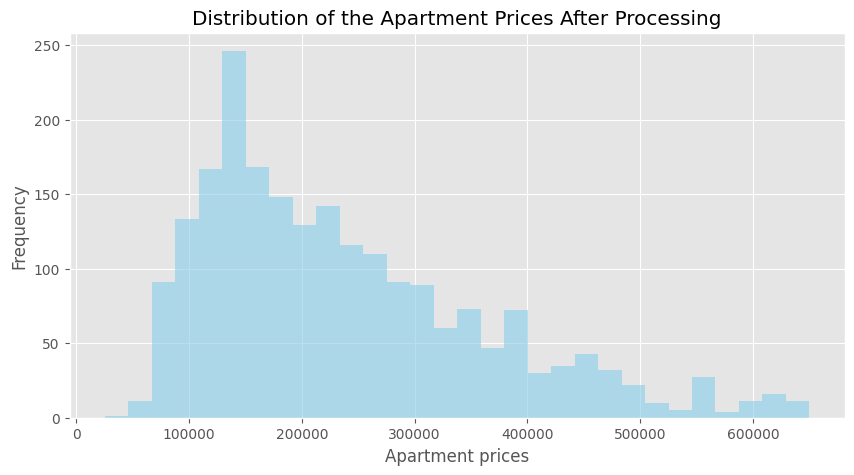

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Style it like in the image (blue bars, density curve)
plt.figure(figsize=(10,5))
plt.hist(data_cleaned.price, bins=30, density=False, alpha=0.6, color='skyblue')

# Fit a density curve
# density = pd.Series(prices).plot.kde(color='b')

# Improving the style to match the provided image
plt.style.use('ggplot')
plt.xlabel('Apartment prices')
plt.ylabel('Frequency')
plt.title('Distribution of the Apartment Prices After Processing')
plt.savefig("../visualizations/Distribution of Prices After Processing.png", dpi=800)
# Show the plot
plt.show()


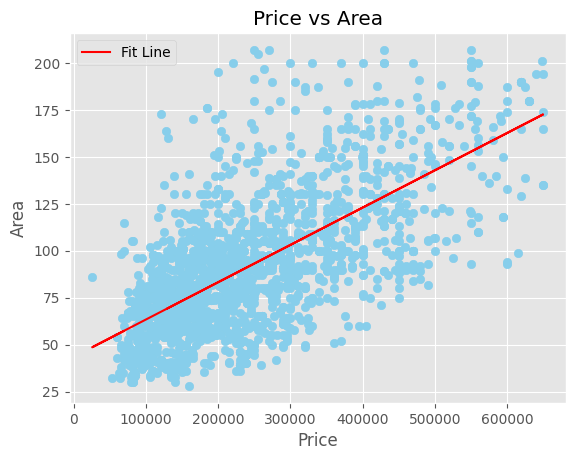

In [130]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data_cleaned["price"], data_cleaned["area"])

# Generating x and y values for the linear regression line
line_x = data_cleaned["price"]
line_y = slope * line_x + intercept

# Plotting the linear regression line
plt.plot(line_x, line_y, color='red', label='Fit Line')

plt.scatter(data_cleaned["price"], data_cleaned["area"], color='skyblue')
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Price vs Area')
plt.legend()
plt.savefig("../visualizations/Price vs Area.png", dpi=800)
plt.show()